<a href="https://colab.research.google.com/github/adervish/random_public/blob/main/Copy_of_NYC_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

hosp_live_url = 'https://health.data.ny.gov/api/views/jw46-jpb7/rows.csv?accessType=DOWNLOAD'
hosp_snapshot_url = 'https://raw.githubusercontent.com/adervish/random_public/main/2021_12_17_snapshot.csv'
hosp = pd.read_csv(hosp_snapshot_url)
hosp['As of Date']= pd.to_datetime(hosp['As of Date'])
testing_url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'
testing = pd.read_csv(testing_url)
testing['Test Date']= pd.to_datetime(testing['Test Date'])

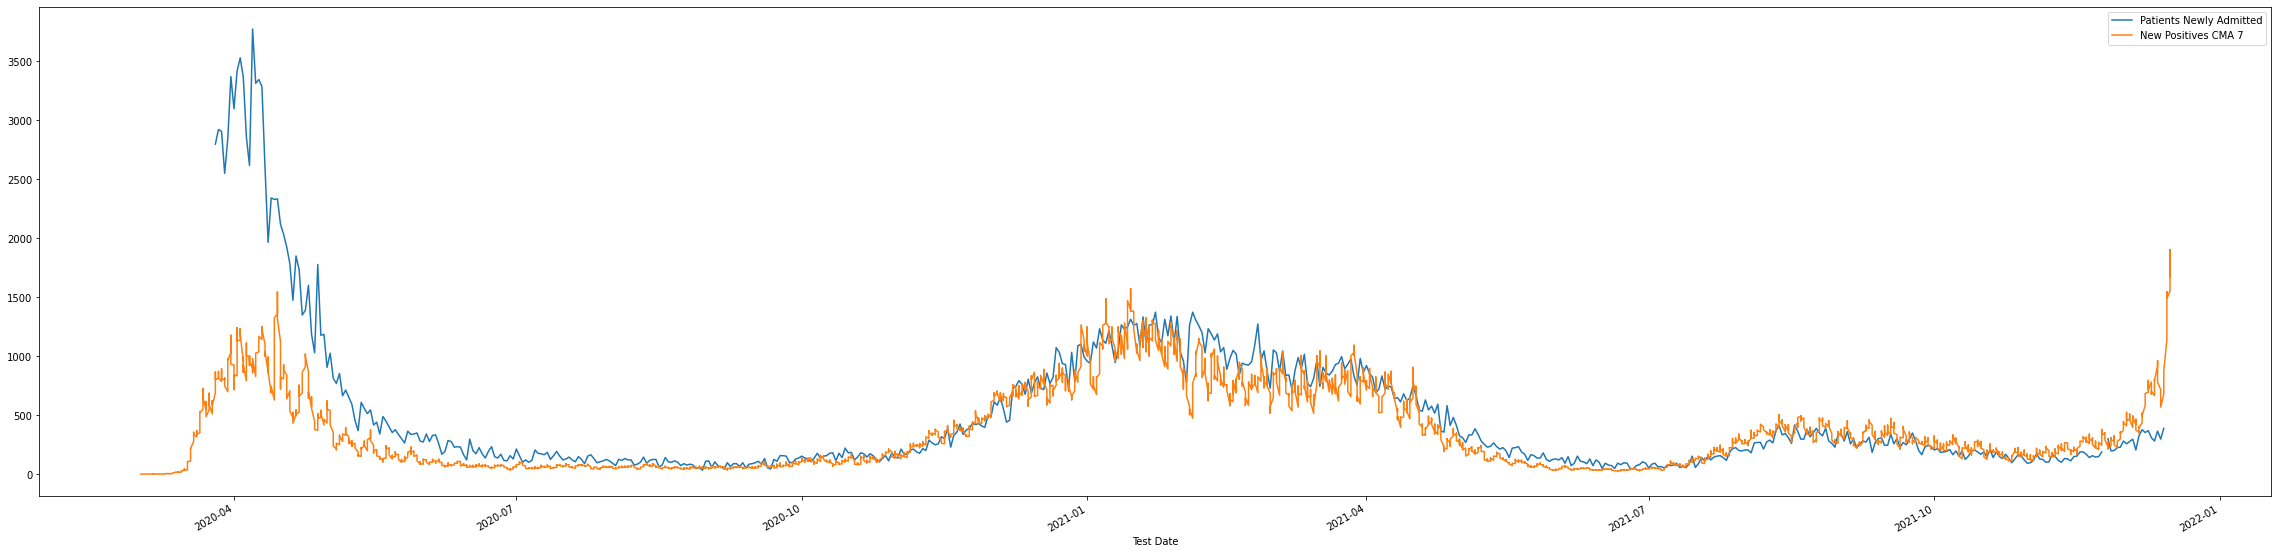

In [ ]:
nyc_hosp = hosp[ hosp['NY Forward Region'] == 'NEW YORK CITY']
nh = nyc_hosp.groupby(['As of Date']).sum()
options = ['Kings', 'New York', 'Bronx', 'Queens', 'Richmond']
nyc = testing[ testing['County'].isin(options) ]
merged = pd.merge(nh, nyc, how='outer', left_index=True, right_on='Test Date')
merged = merged.sort_values('Test Date')
merged['New Positives CMA 7'] = merged['New Positives'].rolling(7).mean()
merged['Patients Newly Admitted'] = merged['Patients Newly Admitted'] * 4
merged.plot(x='Test Date',y=['Patients Newly Admitted', 'New Positives CMA 7'], figsize=(40,10))
